In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)


2023-12-10 19:53:18.583411: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
from PIL import Image
import numpy as np
import os

# FeatureExtractor 인스턴스 생성
fe = FeatureExtractor()

# 'data' 디렉토리의 모든 jpeg 파일에 대해 반복
data_dir = '/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/data'
features_dir = '/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature'  # 경로 수정
supported_extensions = ['.jpeg', '.jpg', '.png', '.bmp', '.dib', '.gif', '.tiff', '.tif', '.ico', '.webp']
for img_path in os.listdir(data_dir):
    if any(img_path.lower().endswith(ext) for ext in supported_extensions):
        feature_path = os.path.join(features_dir, os.path.splitext(img_path)[0] + '.npy')

        # 이미 특징 파일이 존재하는지 확인
        if not os.path.exists(feature_path):
            try:
                full_img_path = os.path.join(data_dir, img_path)

                # 특징 추출
                feature = fe.extract(img=Image.open(full_img_path))
                
                # 추출된 특징 저장
                np.save(feature_path, feature)
            except Exception as e:
                print(f'이미지 처리 중 오류 발생: {full_img_path}, 오류: {e}')
        else:
            print(f'특징 파일이 이미 존재합니다: {feature_path}')

특징 파일이 이미 존재합니다: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 줌 플라이 5 '엘리우드 킵초게'.npy
특징 파일이 이미 존재합니다: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 V2K 런 여성 신발.npy
특징 파일이 이미 존재합니다: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 알파플라이 2 여성 로드 레이싱화.npy
특징 파일이 이미 존재합니다: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 에어 베이퍼맥스 2023 플라이니트 남성 신발 .npy
특징 파일이 이미 존재합니다: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/푸마 터프 패디드 FS 396221-01.npy
특징 파일이 이미 존재합니다: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 에어맥스 AP DQ5023-121.npy


In [45]:
import os

# FeatureExtractor 인스턴스 생성
fe = FeatureExtractor()

features_dir = "/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature"
data_dir = "/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/data"
features = []
img_paths = []

# features 디렉토리의 모든 .npy 파일 로드
for filename in os.listdir(features_dir):
    if filename.endswith(".npy"):
        feature_path = os.path.join(features_dir, filename)
        img_path = os.path.join(data_dir, filename.replace(".npy", ".jpg"))

        print(f"로드 중: {feature_path}")  # 디버깅 정보 출력
        try:
            feature = np.load(feature_path)
            features.append(feature)
            img_paths.append(img_path)
        except Exception as e:
            print(f"파일 로드 실패: {feature_path}, 오류: {e}")

# features 배열이 비어있는지 확인
if not features:
    raise ValueError("특징 벡터가 로드되지 않았습니다.")

features = np.array(features)
path = os.path.join("/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/test_data", "나이키 레볼루션 7 FB2207-001.webp")
# 쿼리 이미지 로드 및 특징 추출
query_img = Image.open(path)  # 쿼리 이미지 경로
query_feature = fe.extract(query_img)

# 유사도 계산
dists = np.linalg.norm(features - query_feature, axis=1)

로드 중: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 줌 플라이 5 '엘리우드 킵초게'.npy
로드 중: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 에어 베이퍼맥스 2023 플라이니트 남성 신발 .npy
로드 중: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 알파플라이 2 여성 로드 레이싱화.npy
로드 중: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 V2K 런 여성 신발.npy
로드 중: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/푸마 터프 패디드 FS 396221-01.npy
로드 중: /Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature/나이키 에어맥스 AP DQ5023-121.npy
1/1 [==============================] - 0s 443ms/step


In [5]:
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO

# URL에서 이미지 로드
def load_image_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        return img
    else:
        raise Exception(f"이미지 로드 실패, HTTP 상태 코드: {response.status_code}")

# 입력된 URL
jpg_url = "https://img.danawa.com/prod_img/500000/283/258/img/2258283_1.jpg?shrink=330:*&_v=20230809131407"
# FeatureExtractor 인스턴스 생성
fe = FeatureExtractor()


# URL에서 이미지 로드 및 특징 추출
query_img = load_image_from_url(jpg_url)
query_feature = fe.extract(query_img)

features_dir = "/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature"
data_dir = "/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/data"
features = []
img_paths = []

# 가능한 확장자 리스트..이거면 되겠지.
possible_extensions = ['.jpg', '.jpeg', '.png', '.webp']

# features 디렉토리의 모든 .npy 파일 로드
for filename in os.listdir(features_dir):
    if filename.endswith(".npy"):
        feature_path = os.path.join(features_dir, filename)
        base_filename = os.path.splitext(filename)[0]

        # 가능한 모든 확장자를 시도하여 이미지 파일 찾아야 할듯.. 다 다다름,,
        for ext in possible_extensions:
            img_path = os.path.join(data_dir, base_filename + ext)
            if os.path.exists(img_path):
                img_paths.append(img_path)
                break

        try:
            feature = np.load(feature_path)
            features.append(feature)
        except Exception as e:
            print(f"파일 로드 실패: {feature_path}, 오류: {e}")
dists = np.linalg.norm(features - query_feature, axis=1)

# 가장 유사한 이미지들의 인덱스 추출
ids = np.argsort(dists)[:5] # 상위 다섯개

# 결과 시각화
plt.figure(figsize=(15, 15))
for idx, id in enumerate(ids):
    try:
        img = Image.open(img_paths[id])
        plt.subplot(5, 6, idx + 1)
        plt.imshow(img)
        plt.title(f"Dist: {dists[id]:.2f}")
        plt.axis('off')
    except FileNotFoundError as e:
        print(f"이미지 로드 실패: {img_paths[id]}, 오류: {e}")

plt.tight_layout()
plt.show()

1/1 [==============================] - 1s 511ms/step


IndexError: list index out of range

<Figure size 1500x1500 with 0 Axes>

In [60]:
ids = np.argsort(dists)[:5]  # 상위 30개 이미지 선택


In [61]:
ids

array([0, 1, 5, 3, 2])

In [67]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np

# FeatureExtractor 인스턴스 생성
fe = FeatureExtractor()

def extract_feature_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return fe.extract(img)

image_urls = [
    "https://img.danawa.com/prod_img/500000/853/888/img/28888853_1.jpg?shrink=330:*&_v=20231020141553",
    "https://img.danawa.com/prod_img/500000/038/578/img/4578038_1.jpg?shrink=330:*&_v=20230918105037",
    "https://img.danawa.com/prod_img/500000/447/209/img/18209447_1.jpg?shrink=330:*&_v=20230918110734",
    "https://img.danawa.com/prod_img/500000/244/585/img/13585244_1.jpg?shrink=330:*&_v=20230816143443",
    "https://img.danawa.com/prod_img/500000/978/632/img/18632978_1.jpg?shrink=330:*&_v=20230202093021",
    "https://img.danawa.com/prod_img/500000/646/961/img/12961646_1.jpg?shrink=330:*&_v=20221228174737",
    "https://img.danawa.com/prod_img/500000/677/435/img/10435677_1.jpg?shrink=330:*&_v=20220810090926",
    "https://img.danawa.com/prod_img/500000/282/323/img/18323282_1.jpg?shrink=330:*&_v=20230718164311",
    "https://img.danawa.com/prod_img/500000/630/698/img/18698630_1.jpg?shrink=330:*&_v=20230721083317",
    "https://img.danawa.com/prod_img/500000/897/445/img/28445897_1.jpg?shrink=330:*&_v=20230922135237",
    "https://img.danawa.com/prod_img/500000/702/922/img/28922702_1.jpg?shrink=330:*&_v=20231023125746",
    "https://img.danawa.com/prod_img/500000/384/595/img/4595384_1.jpg?shrink=330:*&_v=20230913153814",
    "https://img.danawa.com/prod_img/500000/005/890/img/28890005_1.jpg?shrink=330:*&_v=20231108111116",
    "https://img.danawa.com/prod_img/500000/372/837/img/17837372_1.jpg?shrink=330:*&_v=20220919144812",
    "https://img.danawa.com/prod_img/500000/807/299/img/18299807_1.jpg?shrink=330:*&_v=20221116144317",
    "https://img.danawa.com/prod_img/500000/757/088/img/18088757_1.jpg?shrink=330:*&_v=20230918110833",
    "https://img.danawa.com/prod_img/500000/386/215/img/28215386_1.jpg?shrink=330:*&_v=20230913141806"
]

# URL 목록의 이미지 특징 추출
features = [extract_feature_from_url(url) for url in image_urls]

# 쿼리 이미지 URL
query_url =  "https://img.danawa.com/prod_img/500000/799/153/img/28153799_1.jpg?shrink=330:*&_v=20230911093204"
query_feature = extract_feature_from_url(query_url)

# 유사도 계산
dists = np.linalg.norm(np.array(features) - query_feature, axis=1)

# 가장 유사한 이미지들의 인덱스 추출
ids = np.argsort(dists)[:5]  # 상위 5개 이미지 선택

# 결과 출력
for idx in ids:
    print(f"URL: {image_urls[idx]}, Distance: {dists[idx]}")

1/1 [==============================] - 0s 265ms/step
URL: https://img.danawa.com/prod_img/500000/646/961/img/12961646_1.jpg?shrink=330:*&_v=20221228174737, Distance: 0.6318057775497437
URL: https://img.danawa.com/prod_img/500000/677/435/img/10435677_1.jpg?shrink=330:*&_v=20220810090926, Distance: 0.6661970615386963
URL: https://img.danawa.com/prod_img/500000/372/837/img/17837372_1.jpg?shrink=330:*&_v=20220919144812, Distance: 0.669199526309967
URL: https://img.danawa.com/prod_img/500000/807/299/img/18299807_1.jpg?shrink=330:*&_v=20221116144317, Distance: 0.6892337799072266
URL: https://img.danawa.com/prod_img/500000/978/632/img/18632978_1.jpg?shrink=330:*&_v=20230202093021, Distance: 0.7052202820777893


## 제품이름을 바탕으로 이미지 url당 .npy파일 생성하기 

In [1]:
import re
def remove_long_tail(shoe_name):
    # 4자리 이상의 숫자와 문자(알파벳) 조합으로 이루어진 부분을 찾아 제거
    return re.sub(r'\s[\d\w-]{4,}$', '', shoe_name)

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import os
from PIL import Image
import requests
from io import BytesIO

class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

# FeatureExtractor 인스턴스 생성

fe = FeatureExtractor()

# CSV 파일 로드
csv_path = '/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/shoe_data.csv'
df = pd.read_csv(csv_path)

features_dir = "/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature"

for index, row in df.iterrows():
    product_name = row['product_name']  # 모델명 제거
    image_url = row['image_url']
    feature_path = os.path.join(features_dir, f"{product_name}.npy")

    # 파일이 이미 존재하는 경우 건너뛰기
    if os.path.exists(feature_path):
        print(f"파일이 이미 존재합니다: {feature_path}")
        continue

    try:
        # 이미지 URL에서 이미지 다운로드
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content))

        # 이미지 특징 추출
        feature = fe.extract(img)

        # 특징을 .npy 파일로 저장
        np.save(feature_path, feature)
    except Exception as e:
        print(f"이미지 처리 중 오류 발생: {e}, URL: {image_url}")

# 이후의 코드는 이미지 특징이 저장된 .npy 파일을 사용하여 유사도 계산 등의 작업을 수행할 수 있습니다.


1/1 [==============================] - 0s 209ms/step


ValueError: num must be an integer with 1 <= num <= 5, not 6

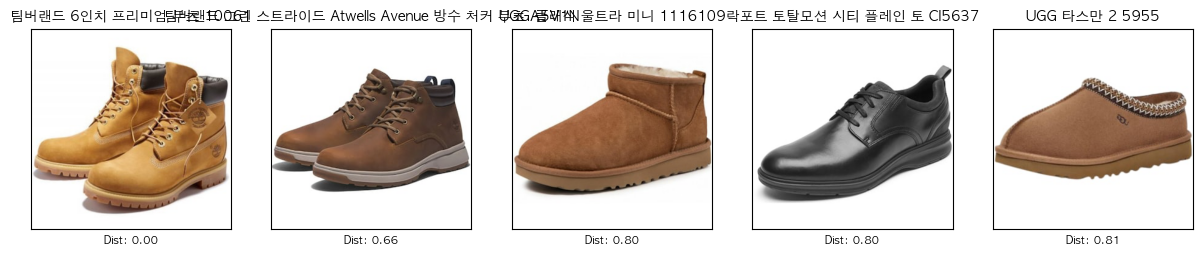

In [11]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import requests
from io import BytesIO
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = ' AppleGothic'  # 예시: Windows에서 '맑은 고딕' 사용

# 필요한 나머지 코드...

# CSV 파일 로드
csv_file = '/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/shoe_data.csv'
df = pd.read_csv(csv_file)

# 입력된 URL
input_url = 'https://img.danawa.com/prod_img/500000/283/258/img/2258283_1.jpg?shrink=330:*&_v=20230809131407'

# URL과 일치하는 행 찾기
product_name = df[df['image_url'] == input_url]['product_name'].iloc[0]

# 해당 product_name과 일치하는 .npy 파일 찾기
features_dir = '/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature'
feature_path = os.path.join(features_dir, product_name + '.npy')
query_feature = np.load(feature_path)
# 모든 .npy 파일과의 유사도 비교
features = []
product_names = []
for filename in os.listdir(features_dir):
    if filename.endswith('.npy'):
        feature = np.load(os.path.join(features_dir, filename))
        features.append(feature)
        product_names.append(filename.split('.npy')[0])

# 유사도 계산
dists = np.linalg.norm(np.array(features) - query_feature, axis=1)

# 상위 5개 선택
top_indices = np.argsort(dists)[:5]
top_product_names = [product_names[i] for i in top_indices]
top_dists = [dists[i] for i in top_indices]

# 각 product_name에 해당하는 image_url 찾기 및 시각화
plt.figure(figsize=(15, 15))
for i, name in enumerate(top_product_names):
    image_url = df[df['product_name'] == name]['image_url'].iloc[0]
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(name, fontsize=10)  # 제품명을 타이틀로 추가
    plt.xlabel(f"Dist: {top_dists[i]:.2f}", fontsize=8)  # 거리를 x축 라벨로 추가
    plt.xticks([])  # x축 눈금 제거
    plt.yticks([])  # y축 눈금 제거
plt.tight_layout()
plt.show()


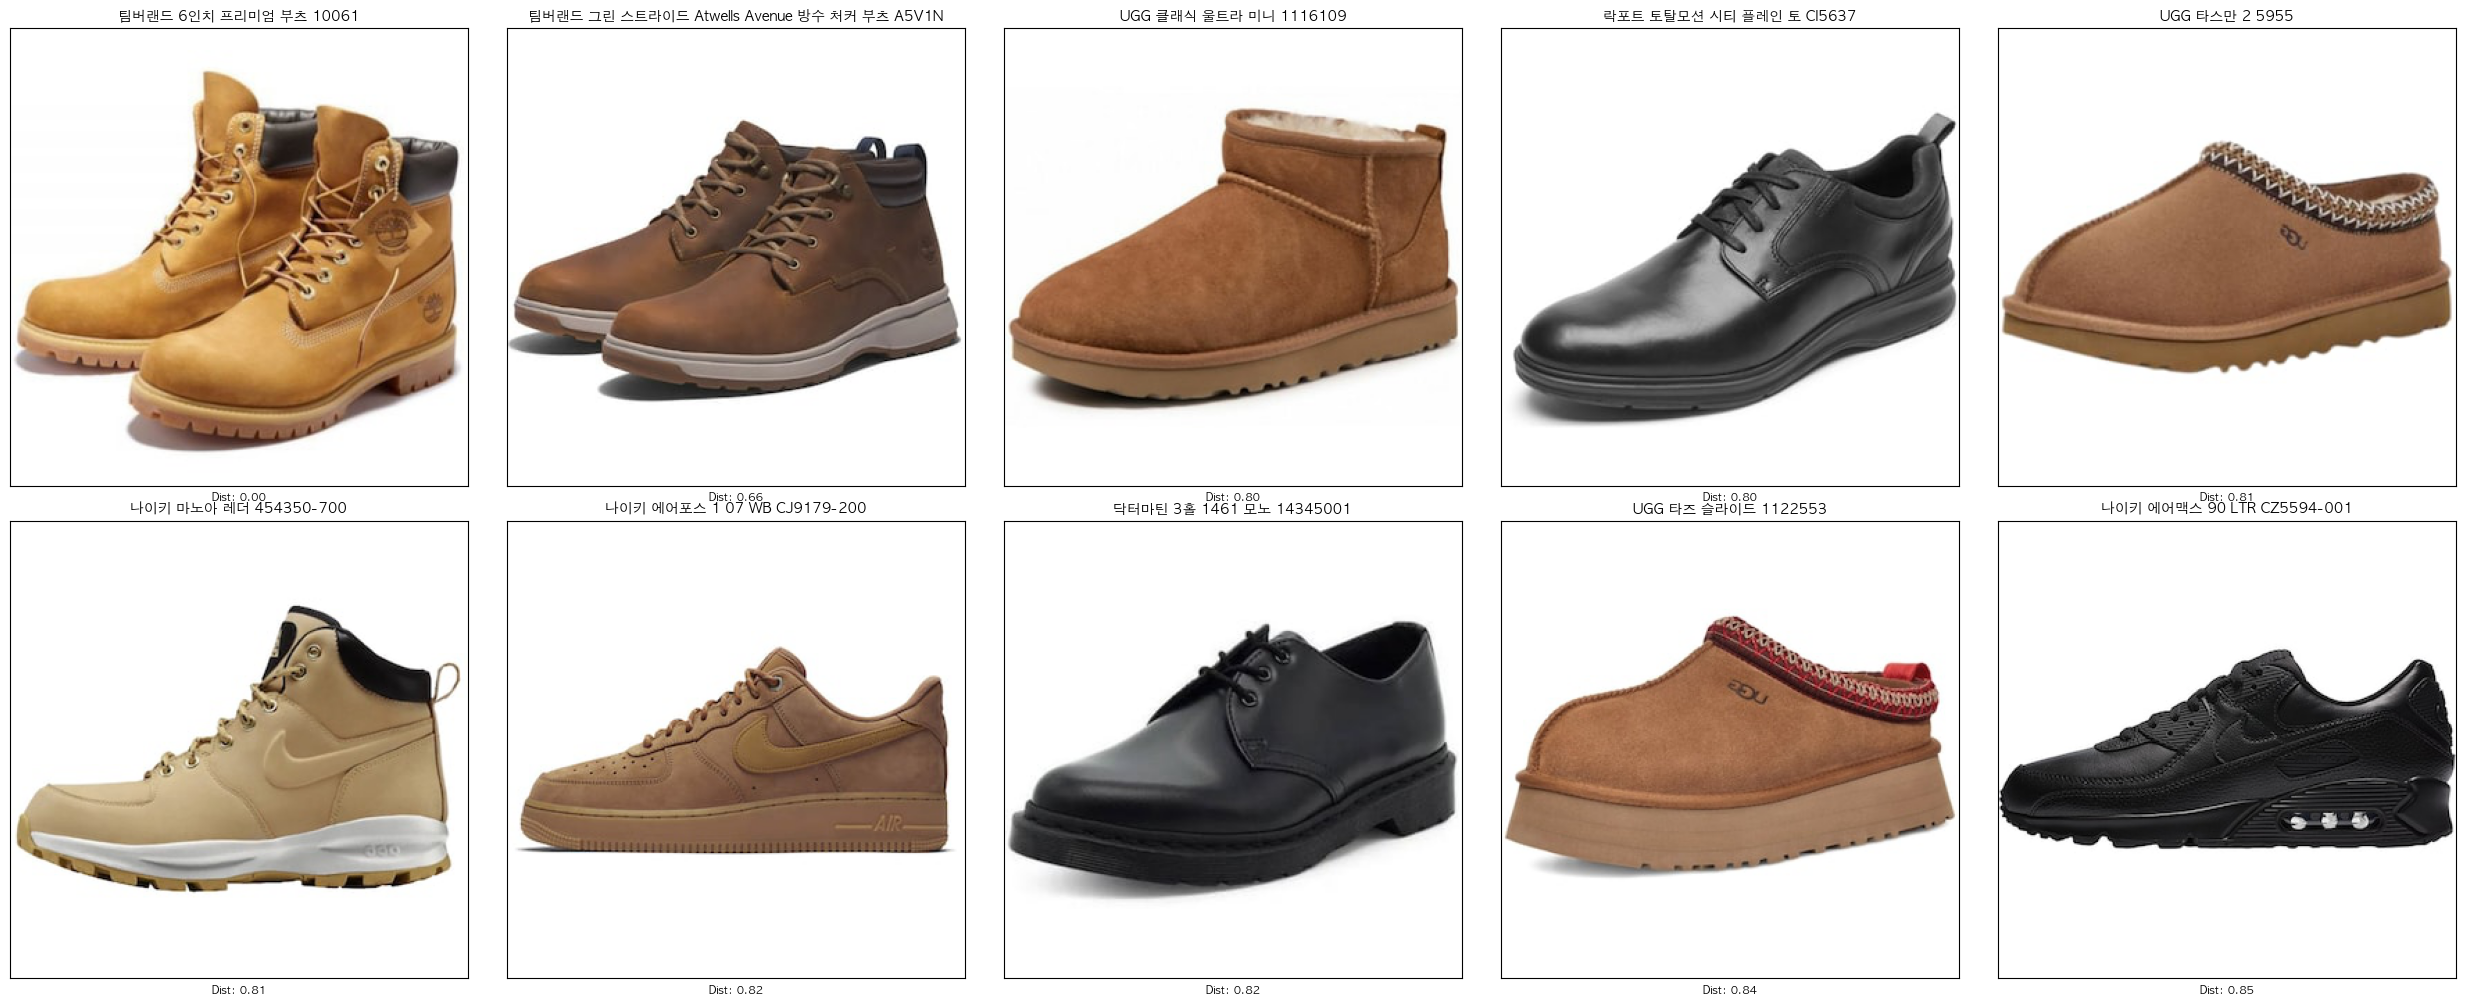

In [12]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # 시스템에 맞는 폰트로 변경

# CSV 파일 로드
csv_file = '/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/shoe_data.csv'
df = pd.read_csv(csv_file)

# 입력된 URL
input_url = 'https://img.danawa.com/prod_img/500000/283/258/img/2258283_1.jpg?shrink=330:*&_v=20230809131407'

# URL과 일치하는 행 찾기
product_name = df[df['image_url'] == input_url]['product_name'].iloc[0]

# 해당 product_name과 일치하는 .npy 파일 찾기
features_dir = '/Users/kang-youngmin/Desktop/coding/youbute_recommen/shoe_similarity/feature'
feature_path = os.path.join(features_dir, product_name + '.npy')
query_feature = np.load(feature_path)

# 모든 .npy 파일과의 유사도 비교
features = []
product_names = []
for filename in os.listdir(features_dir):
    if filename.endswith('.npy'):
        feature = np.load(os.path.join(features_dir, filename))
        features.append(feature)
        product_names.append(filename.split('.npy')[0])

# 유사도 계산
dists = np.linalg.norm(np.array(features) - query_feature, axis=1)

# 상위 10개 선택
top_indices = np.argsort(dists)[:10]
top_product_names = [product_names[i] for i in top_indices]
top_dists = [dists[i] for i in top_indices]

# 각 product_name에 해당하는 image_url 찾기 및 시각화
plt.figure(figsize=(25, 10))  # 크기 조정
for i, name in enumerate(top_product_names):
    image_url = df[df['product_name'] == name]['image_url'].iloc[0]
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    plt.subplot(2, 5, i + 1)  # 2행 5열로 변경
    plt.imshow(img)
    plt.title(name, fontsize=10)  # 제품명을 타이틀로 추가
    plt.xlabel(f"Dist: {top_dists[i]:.2f}", fontsize=8)  # 거리를 x축 라벨로 추가
    plt.xticks([])  # x축 눈금 제거
    plt.yticks([])  # y축 눈금 제거
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

class FeatureExtractor:
    def __init__(self):
        # VGG-16 모델을 사용하여 이미지넷(ImageNet) 가중치로 초기화
        # VGG-16은 224x224 픽셀의 이미지에 대해 훈련된 깊은 컨볼루션 신경망입니다.
        base_model = VGG16(weights='imagenet')

        # 모델을 커스터마이징하여 완전 연결 계층(fully-connected layer)의 특징을 반환하도록 설정
        # 'fc1' 레이어는 이미지의 높은 수준의 특징을 캡처합니다.
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        # 이미지 크기를 VGG-16의 입력 크기인 224x224로 조정
        img = img.resize((224, 224))

        # 이미지의 색공간을 RGB로 변환
        # PIL 라이브러리는 기본적으로 이미지를 RGB가 아닌 다른 형식으로 로드할 수 있으므로 변환 필요
        img = img.convert('RGB')

        # 이미지를 배열로 변환하고 차원 확장
        # 이미지를 모델에 입력하기 위해 필요한 형식으로 변환
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # 이미지를 사전 처리하여 VGG-16에 적합한 형태로 변환
        # 이는 모델이 훈련될 때 적용된 전처리와 일치해야 합니다.
        x = preprocess_input(x)

        # 이미지의 특징 추출
        # 모델의 예측을 수행하고 첫 번째 결과를 반환
        feature = self.model.predict(x)[0]

        # 추출된 특징을 L2 노름으로 정규화
        # 이는 특징 벡터가 유사도 계산에 사용될 때 길이에 무관하게 만듭니다.
        return feature / np.linalg.norm(feature)
